In [2]:
!pip install opencv-python

(552, 828, 3)
[[[ 34 103  82]
  [ 33 102  81]
  [ 33 102  81]
  ...
  [ 31 101  78]
  [ 31 101  78]
  [ 30 100  77]]

 [[ 33 102  81]
  [ 33 102  81]
  [ 32 101  80]
  ...
  [ 31 101  78]
  [ 31 101  78]
  [ 30 100  77]]

 [[ 32 101  80]
  [ 32 101  80]
  [ 32 101  80]
  ...
  [ 31 101  78]
  [ 31 101  78]
  [ 31 101  78]]

 ...

 [[ 35 107  84]
  [ 34 106  83]
  [ 32 104  81]
  ...
  [ 32 101  80]
  [ 33 102  81]
  [ 35 104  83]]

 [[ 33 105  82]
  [ 33 105  82]
  [ 34 106  83]
  ...
  [ 25  97  75]
  [ 29 101  79]
  [ 32 104  82]]

 [[ 32 104  81]
  [ 33 105  82]
  [ 35 107  84]
  ...
  [ 26  98  76]
  [ 31 103  81]
  [ 36 108  86]]]


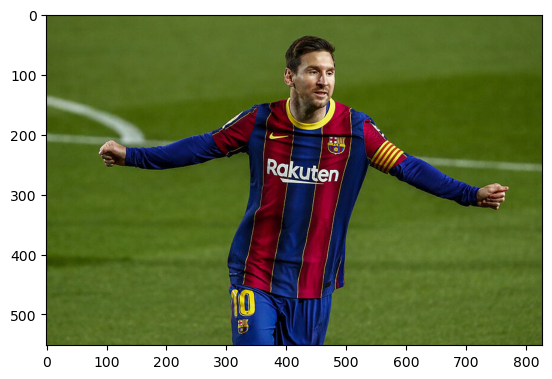

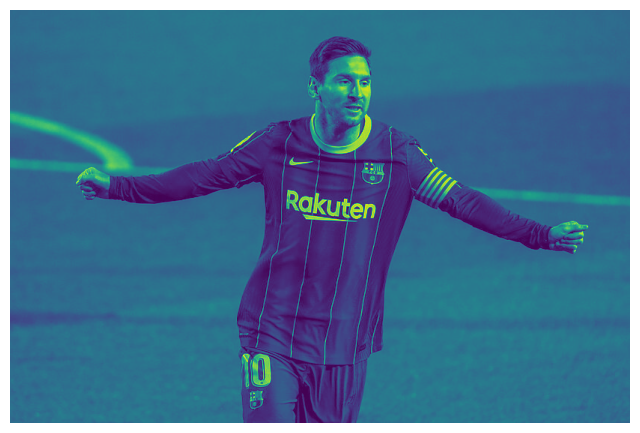

In [4]:
# First import the libraries cv2 and matplotlib
import cv2
import matplotlib.pyplot as plt
image_name = 'messi.jpg'

# Read an image file using cv2
img = cv2.imread(image_name)
type(img)

#Check out the shape of the image array
print(img.shape)

#Print the image array
print(img)

#Convert from the BGR format to RGB. BGR is the default format in opencv. Display the image
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()
plt.figure(figsize=(8,10))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2GRAY))
plt.axis('off')
plt.show()

In [5]:
image_name = "lion.webp"
# Read an image file using cv2
img = cv2.imread(image_name)
type(img)

numpy.ndarray

In [6]:
#Shape of the image
print(img.shape)

(1085, 1600, 3)


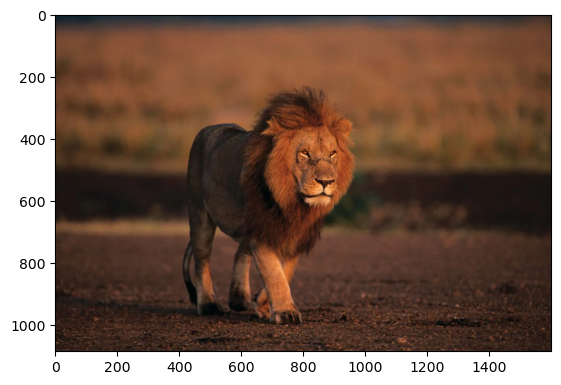

In [7]:
#Display the image as an RGB color image
img_color = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_color)
plt.show()

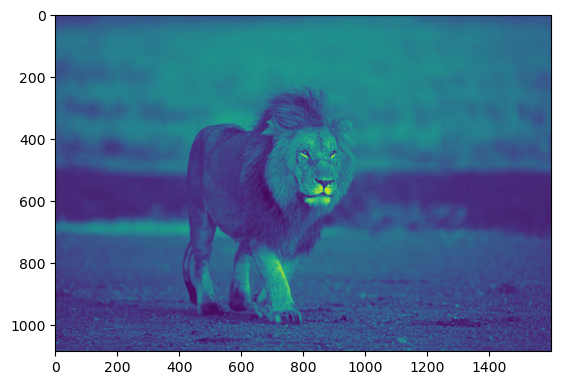

In [8]:
#Convert to a grayscale image
img_gray = cv2.cvtColor(img_color, cv2.COLOR_BGR2GRAY )
plt.imshow(img_gray)
plt.show()

In [9]:
#Print out the shape of the gray scale image and its array
print(img_gray.shape)
print(img_gray)

(1085, 1600)
[[38 38 38 ... 41 42 42]
 [38 38 38 ... 42 42 42]
 [38 38 38 ... 43 43 43]
 ...
 [27 29 33 ... 38 38 31]
 [24 25 30 ... 36 36 29]
 [24 25 30 ... 34 34 28]]


Height and width of original image 1085 1600
Original Image


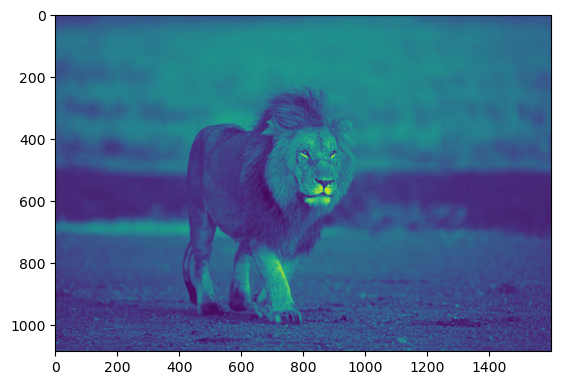

Rotated Image


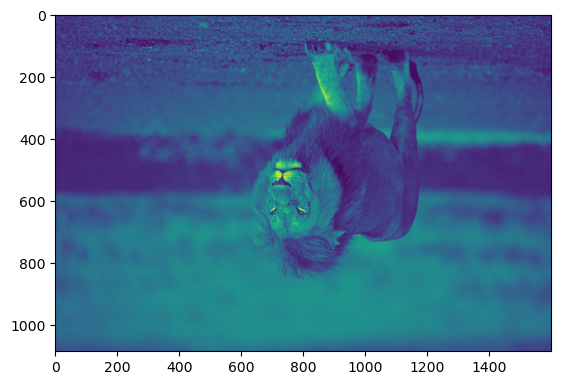

In [10]:
#Rotate the grayscale image by 180 degrees
# First we need to obtain the center of original image by dividing height and width by 2
height, width = img_gray.shape[:2]
print("Height and width of original image", height, width)
# get the coordinates of the center of the image to create the 2D rotation matrix
center = (width/2, height/2)
# using cv2.getRotationMatrix2D() to get the rotation matrix
rotate_matrix = cv2.getRotationMatrix2D(center=center, angle=180, scale=1)
# rotate the image using cv2.warpAffine
rotated_image = cv2.warpAffine(src=img_gray, M=rotate_matrix, dsize=(width, height))
print("Original Image")
plt.imshow(img_gray)
plt.show()
print("Rotated Image")
plt.imshow(rotated_image)
plt.show()

Original Image


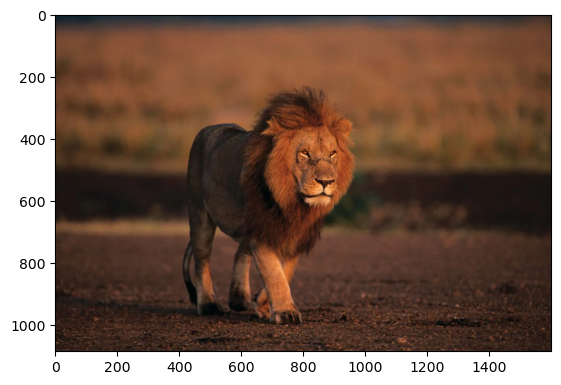

Rotated Image


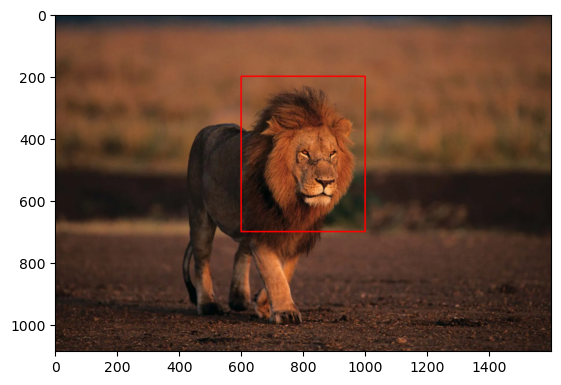

Original Image annotated with text


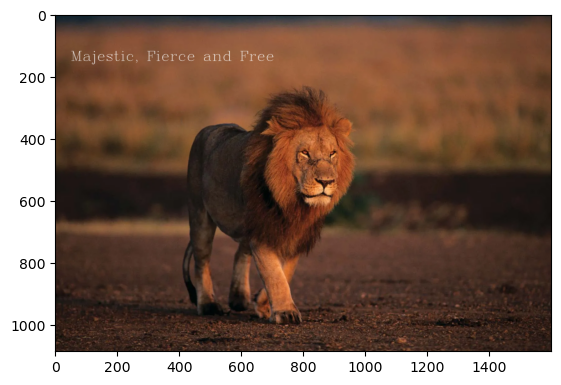

In [11]:
#Annotate the image with a rectangle
#@title Drawing a rectangle on the image
# make a copy
imageRectangle = img_color.copy()
# define the starting and end points of the rectangle
start_point =(600,200)
end_point =(1000,700)
# draw the rectangle
cv2.rectangle(imageRectangle, start_point, end_point, (255, 0, 0), thickness= 3,
lineType=cv2.LINE_8)
# display
print("Original Image")
plt.imshow(img_color)
plt.show()
print("Rotated Image")
plt.imshow(imageRectangle)
plt.show()
#@title add text to image
imageText = img_color.copy()
text = 'Majestic, Fierce and Free'
org = (50,150) #position of text on the image
cv2.putText(imageText, text, org, fontFace = cv2.FONT_HERSHEY_COMPLEX, fontScale = 1.5,
color = (255,255,255))
print("Original Image annotated with text")
plt.imshow(imageText)
plt.show()

Original Image with identity kernel applied


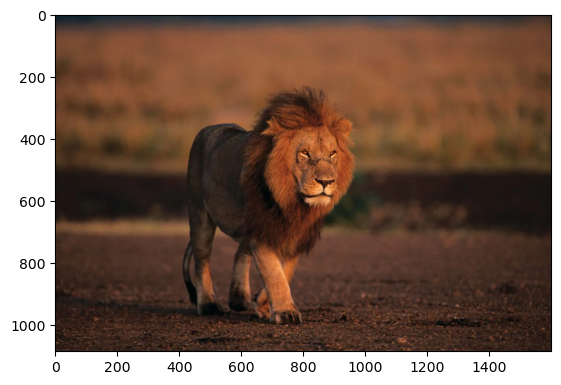

In [12]:
#You will apply Identity kernel, blurring kernel, medium blur and image sharpening
#@title Image Filtering Using Convolution in OpenCV
#The identity kernel leaves the image unchanged since it acts as a filter that preserves the original pixel values.
import numpy as np
# define an identity filter or kernel
kernel1 = np.array([[0, 0, 0],
[0, 1, 0],
[0, 0, 0]])
#Apply the kernel to image
identity = cv2.filter2D(src=img_color, ddepth=-1, kernel=kernel1)
print("Original Image with identity kernel applied")
plt.imshow(identity)
plt.show()

Original Image with blurring kernel applied


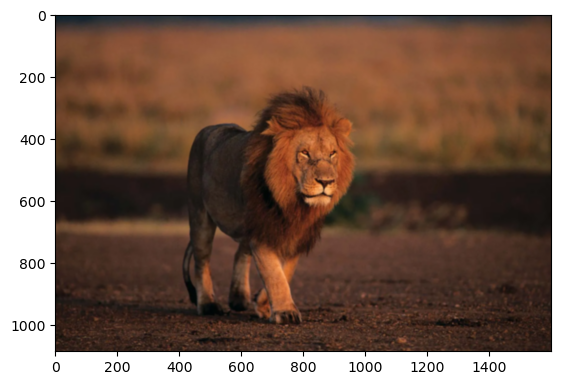

In [13]:
#@title Apply blurring kernel
#blurring kernel here is a floating point type 5x5 matrix of all 1's, it then normzlizes
# values by dividing them by 25 (size of the matrix)
#The blurring kernel performs a simple averaging operation over a 5x5 neighborhood,
# resulting in a smoothed or blurred version of the image.
kernel2 = np.ones((5, 5), np.float32) / 25
#apply kernel
img_blurred = cv2.filter2D(src=img_color, ddepth=-1, kernel=kernel2)
print("Original Image with blurring kernel applied")
plt.imshow(img_blurred)
plt.show()

Original Image with median blur applied


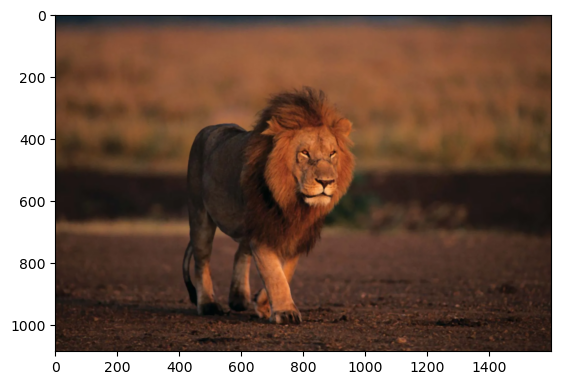

In [14]:
#@title Applying Median blur to an image
'''
Median blur is a type of non-linear filtering.
It replaces each pixel value with the median value of its neighborhood.
src is the image file, ksize is the kernel size - the size of neighborhood window. It must be an odd
integer.
'''
median = cv2.medianBlur(src=img_color, ksize=5)
print("Original Image with median blur applied")
plt.imshow(median)
plt.show()

Original Image with Sharpening filter applied


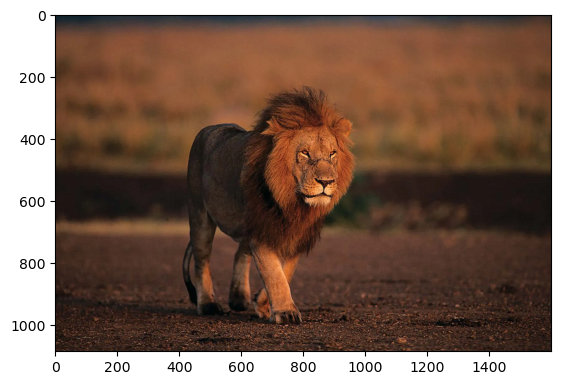

In [15]:
#image sharpening with a kernel
#@title Sharpening an image using a kernel
kernel3 = np.array([[0, -1, 0],
[-1, 5, -1],
[0, -1, 0]])
sharp_img = cv2.filter2D(src=img_color, ddepth=-1, kernel=kernel3)
print("Original Image with Sharpening filter applied")
plt.imshow(sharp_img)
plt.show()

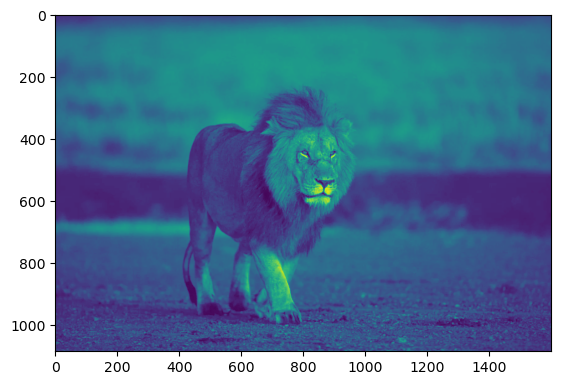

Grayscale Image with binary threshold applied


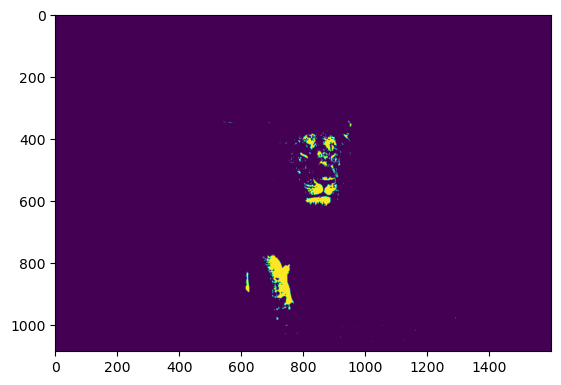

In [17]:
#@title Image Thresholding a grayscale image to black and white
'''
Image thresholding is a common image processing technique used to separate objects
or regions of interest from the background by converting a grayscale image into a binary image.
'''
image_source ="lion.webp"
img_grayscale = cv2.imread(image_source, cv2.IMREAD_GRAYSCALE);
plt.imshow(img_grayscale)
plt.show()
# Basic threhold example
th, dst = cv2.threshold(img_grayscale, 127, 255, cv2.THRESH_BINARY);
print("Grayscale Image with binary threshold applied")
plt.imshow(dst)
plt.show()

Grayscale Image with truncating threshold applied


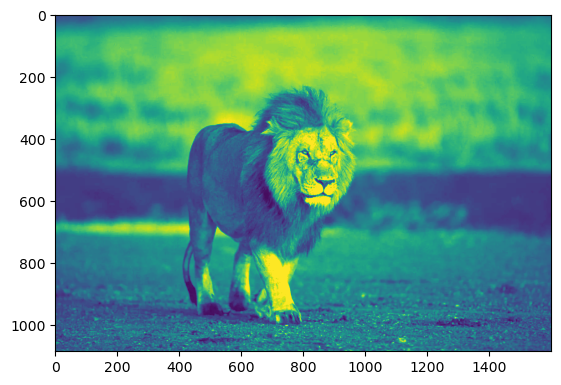

In [18]:
# Thresholding using THRESH_TRUNC
'''
This particular thresholding method truncates (sets to the threshold value)
pixel values that exceed a specified threshold and leaves the pixel values
unchanged if they are below or equal to the threshold.
'''
th, dst = cv2.threshold(img_grayscale,127,255, cv2.THRESH_TRUNC)
print("Grayscale Image with truncating threshold applied")
plt.imshow(dst)
plt.show()

Grayscale Image with inverse binary threshold applied


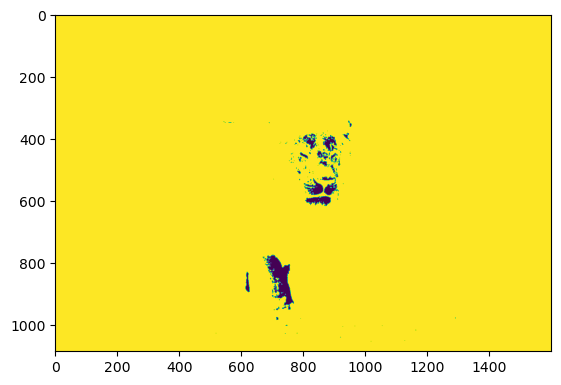

In [19]:
# Thresholding using THRESH_BINARY_INV
'''
cv2.THRESH_BINARY_INV creates the inverse of the binary image,
where pixel values above the threshold are set to zero, and values below or equal
to the threshold are set to a maximum value.
'''
th, dst = cv2.threshold(img_grayscale,127,255, cv2.THRESH_BINARY_INV)
print("Grayscale Image with inverse binary threshold applied")
plt.imshow(dst)
plt.show()

Grayscale Image with binary threshold to zero applied


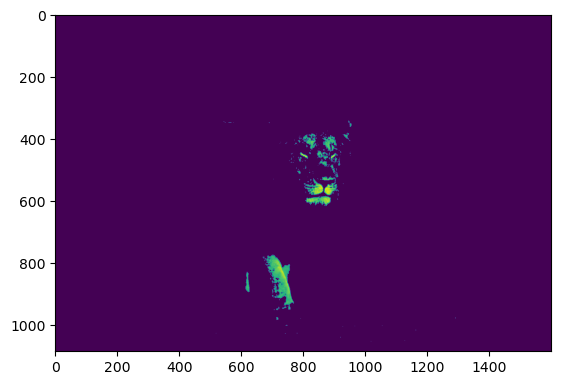

In [20]:
# Thresholding using THRESH_TOZERO
# cv2.THRESH_TOZERO sets pixel values to zero if they are above the threshold else leaves them unchanged
th, dst = cv2.threshold(img_grayscale,127,255, cv2.THRESH_TOZERO);
print("Grayscale Image with binary threshold to zero applied")
plt.imshow(dst)
plt.show()

Canny edge detection


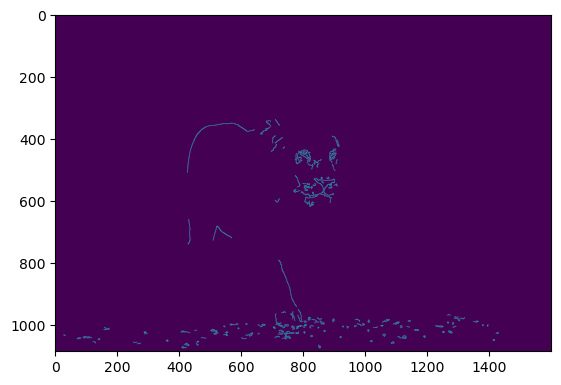

In [21]:
# Apply Gaussian blur to the grayscale image using cv2.GaussianBlur
# with a kernel size of (3,3) to smooth the image and reduce noise.
img_blur = cv2.GaussianBlur(img_grayscale, (3,3), 0)
edges = cv2.Canny(image=img_blur, threshold1=100, threshold2=200)
print("Canny edge detection")
plt.imshow(edges)
plt.show()